# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [63]:
import pandas as pd
import datetime
import numpy as np

# Load the data into a DataFrame
df = pd.read_csv("../../../../iowa_data/Iowa_Liquor_sales_sample_10pct.csv")

In [64]:
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"])

# Remove redundant columns
df.drop("Volume Sold (Gallons)", axis = 1, inplace = True)


# Remove $ from certain columns
dcs = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in dcs:
    df[col] = df[col].map(lambda x: float(x.lstrip('$')))

df.dtypes

Date                    datetime64[ns]
Store Number                     int64
City                            object
Zip Code                        object
County Number                  float64
County                          object
Category                       float64
Category Name                   object
Vendor Number                    int64
Item Number                      int64
Item Description                object
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)           float64
dtype: object

In [65]:
df['Profit'] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]

In [66]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,43.20


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                    270955 non-null datetime64[ns]
Store Number            270955 non-null int64
City                    270955 non-null object
Zip Code                270955 non-null object
County Number           269878 non-null float64
County                  269878 non-null object
Category                270887 non-null float64
Category Name           270323 non-null object
Vendor Number           270955 non-null int64
Item Number             270955 non-null int64
Item Description        270955 non-null object
Bottle Volume (ml)      270955 non-null int64
State Bottle Cost       270955 non-null float64
State Bottle Retail     270955 non-null float64
Bottles Sold            270955 non-null int64
Sale (Dollars)          270955 non-null float64
Volume Sold (Liters)    270955 non-null float64
Profit                  270955 non-null float64
dtypes: datetime64[ns](1), float6

In [68]:
cat_sub = df.groupby(["Category Name"])
# ["State Bottle Cost"].min()
# cat_subdf = pd.DataFrame(cat_sub).reset_index()
cat_sub.get_group(("APRICOT BRANDIES"))

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,27.00
15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,9.00
132,2015-05-13,4156,OELWEIN,50662,33.0,Fayette,1051100.0,APRICOT BRANDIES,434,54446,Paramount Apricot Flavored Brandy,750,5.48,8.22,12,98.64,9.00,32.88
321,2016-02-23,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,42.72
1020,2015-03-30,3611,LOGAN,51546,43.0,Harrison,1051100.0,APRICOT BRANDIES,434,54446,Paramount Apricot Flavored Brandy,750,5.48,8.22,12,98.64,9.00,32.88
1089,2016-02-29,5071,DURANT,52747,16.0,Cedar,1051100.0,APRICOT BRANDIES,434,54056,Arrow Apricot Flav Brandy,750,5.38,8.07,2,16.14,1.50,5.38
1241,2015-07-08,4273,DES MOINES,50317,77.0,Polk,1051100.0,APRICOT BRANDIES,434,54056,Arrow Apricot Flav Brandy,750,5.38,8.07,1,8.07,0.75,2.69
1552,2015-05-06,3723,ONAWA,51040,67.0,Monona,1051100.0,APRICOT BRANDIES,259,52314,Christian Bros Brandy,375,3.23,4.85,7,33.95,2.62,11.34
1639,2015-04-13,2487,ANAMOSA,52205,53.0,Jones,1051100.0,APRICOT BRANDIES,434,54444,Paramount Apricot Flavored Brandy,375,3.55,5.33,4,21.32,1.50,7.12
1700,2015-04-29,3980,IOWA CITY,52246,52.0,Johnson,1051100.0,APRICOT BRANDIES,434,54056,Arrow Apricot Flav Brandy,750,5.38,8.07,12,96.84,9.00,32.28


In [69]:
##Replace Nulls/Nans with values in the dataset

null_subset = df[df.isnull().any(axis=1)]

null_sub_county = null_subset.groupby(["Store Number", "City", "County Number", "County"])["Date"].count()
null_sub_county = pd.DataFrame(null_sub_county).reset_index()

null_sub_cat = null_subset.groupby(["Store Number", "Category", "Category Name", "Item Number"])["Date"].count()
null_sub_cat = pd.DataFrame(null_sub_cat).reset_index()

In [70]:
# null_subset[["Store Number", "County", "County Number"]]
null_sub_county[null_sub_county.isnull().any(axis=1)]
# null_sub_county
null_subset.groupby(['Zip Code', 'County Number', 'County'])['County'].isnull()

AttributeError: Cannot access callable attribute 'isnull' of 'SeriesGroupBy' objects, try using the 'apply' method

In [93]:
# df[(df["City"]=='WEST DES MOINES')]
# df[df.isnull().any(axis=1)][df["City"]=='WEST DES MOINES']
# df[df["Store Number"]==2521]

def grouper_unique(col, identifier, df):
    """Groups by the column and makes a list of its unique identifiers"""
    dt = {}
    #iterate through each unique value in our list of unique values in the column specified
    for uni in df[col].unique():
        #create subset of the identifiers for that specific unique value
        sub = df[df[col]== uni].groupby([identifier])[identifier].count()
        sub = pd.DataFrame(sub).reset_index()
        #list of the identifiers for that unique value uni in our group of unique values for that column
        ident = list(sub[identifier].unique())
        dt[uni] = ident
    return dt

categories = grouper_unique('Category', 'Item Number', df)

ValueError: cannot insert Item Number, already exists

In [123]:
dfc = df.copy()
dfc.interpolate(method = 'linear', inplace = True, limit_direction = 'both')
dfc.ffill(method = "backfill")
dfc.info()
# wut = dfc[dfc.isnull().any(axis=1)].groupby(['Store Number', 'County', 'County Number'])['Date'].count()
# wut = pd.DataFrame(wut).reset_index()
# wut

TypeError: ffill() got an unexpected keyword argument 'method'

In [142]:
dfc = df.copy()
# dfc.interpolate(method = 'linear', inplace = True, limit_direction = 'both')
for group_label, group_df in dfc.groupby("Zip Code"):
    dfc[dfc["Zip Code"] == group_label] = dfc[dfc["Zip Code"] == group_label].sort("County Number").ffill()
    dfc[dfc["Zip Code"] == group_label] = dfc[dfc["Zip Code"] == group_label].sort("County").ffill()
    
dfc.info()

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                    270955 non-null datetime64[ns]
Store Number            270955 non-null int64
City                    270955 non-null object
Zip Code                270955 non-null object
County Number           270943 non-null float64
County                  270943 non-null object
Category                270955 non-null float64
Category Name           270955 non-null object
Vendor Number           270955 non-null int64
Item Number             270955 non-null int64
Item Description        270955 non-null object
Bottle Volume (ml)      270955 non-null int64
State Bottle Cost       270955 non-null float64
State Bottle Retail     270955 non-null float64
Bottles Sold            270955 non-null int64
Sale (Dollars)          270955 non-null float64
Volume Sold (Liters)    270955 non-null float64
Profit                  270955 non-null float64
Month                   270955 no

In [138]:
dfc['County'].unique()

array(['Bremer', 'Scott', 'Black Hawk', 'Story', 'Wright', 'Linn',
       'Wapello', 'Cerro Gordo', 'Polk', 'Benton', 'Mahaska', 'Lee',
       'Johnson', 'Jasper', 'Tama', 'Sioux', 'Dickinson', 'Pottawattamie',
       'Warren', 'Webster', 'Boone', 'Jackson', 'Carroll', 'Hamilton',
       'Woodbury', 'Washington', 'Floyd', 'Delaware', "O'Brien",
       'Buena Vista', 'Grundy', 'Dubuque', 'Adair', 'Crawford', 'Henry',
       'Guthrie', 'Winneshiek', 'Clay', 'Muscatine', 'Taylor', 'Harrison',
       'Hardin', 'Kossuth', 'Dallas', 'Decatur', 'Clinton', 'Butler',
       'Des Moines', 'Calhoun', 'Fayette', 'Jones', nan, 'Hancock', 'Iowa',
       'Howard', 'Appanoose', 'Jefferson', 'Emmet', 'Marshall', 'Page',
       'Cedar', 'Clayton', 'Sac', 'Monona', 'Allamakee', 'Winnebago',
       'Poweshiek', 'Marion', 'Buchanan', 'Franklin', 'Cherokee',
       'Humboldt', 'Greene', 'Keokuk', 'Plymouth', 'Shelby', 'Clarke',
       'Palo Alto', 'Cass', 'Lyon', 'Pocahontas', 'Ida', 'Union',
       'Fremon

In [146]:
dfc[dfc["Store Number"]==5223]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit,Month,Quarter
46599,2016-03-15,5223,TABOR,51653,NaN,NaN,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,Jagermeister Liqueur,375,6.52,9.78,3,29.34,1.12,9.78,3,1
140719,2016-03-15,5223,TABOR,51653,NaN,NaN,1011500.0,STRAIGHT RYE WHISKIES,255,27102,Templeton Rye,750,18.09,27.14,6,162.84,4.50,54.30,3,1
202083,2016-03-15,5223,TABOR,51653,NaN,NaN,1012100.0,CANADIAN WHISKIES,260,11296,Crown Royal,750,15.00,22.50,6,135.00,4.50,45.00,3,1


In [144]:
dfc[dfc.isnull().any(axis = 1)].sort("Zip Code")

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit,Month,Quarter
156543,2016-03-09,5216,RUNNELLS,50237,NaN,NaN,1081300.0,PEPPERMINT SCHNAPPS,434,81206,Paramount Peppermint Schnapps,750,3.75,5.63,6,33.78,4.50,11.28,3,1
213206,2016-03-09,5216,RUNNELLS,50237,NaN,NaN,1011100.0,BLENDED WHISKIES,260,25604,Seagrams 7 Crown Bl Whiskey,375,3.50,5.25,6,31.50,2.25,10.50,3,1
234840,2016-03-09,5216,RUNNELLS,50237,NaN,NaN,1012100.0,CANADIAN WHISKIES,115,11776,Black Velvet,750,5.23,7.85,12,94.20,9.00,31.44,3,1
46599,2016-03-15,5223,TABOR,51653,NaN,NaN,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,Jagermeister Liqueur,375,6.52,9.78,3,29.34,1.12,9.78,3,1
140719,2016-03-15,5223,TABOR,51653,NaN,NaN,1011500.0,STRAIGHT RYE WHISKIES,255,27102,Templeton Rye,750,18.09,27.14,6,162.84,4.50,54.30,3,1
202083,2016-03-15,5223,TABOR,51653,NaN,NaN,1012100.0,CANADIAN WHISKIES,260,11296,Crown Royal,750,15.00,22.50,6,135.00,4.50,45.00,3,1
50149,2016-03-30,5217,SEYMOUR,52590,NaN,NaN,1012100.0,CANADIAN WHISKIES,65,10625,Canadian Club Whisky Pet,750,7.88,11.82,3,35.46,2.25,11.82,3,1
89794,2016-01-13,5217,SEYMOUR,52590,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,1.80,2.70,12,32.40,4.50,10.80,1,1
120722,2016-01-13,5217,SEYMOUR,52590,NaN,NaN,1042100.0,IMPORTED DRY GINS,260,28865,Tanqueray Gin,375,6.99,10.49,6,62.94,2.25,21.00,1,1
131595,2016-01-13,5217,SEYMOUR,52590,NaN,NaN,1011300.0,TENNESSEE WHISKIES,85,26820,Jack Daniels Old #7 Black Lbl Flat,375,7.00,10.50,12,126.00,4.50,42.00,1,1


In [143]:
dfc[(dfc['City']== 'ANAMOSA') & dfc.isnull().any(axis = 1)]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit,Month,Quarter


In [72]:
practice_cat = null_subset[null_subset[["County", "County Number"]].isnull().any(axis=1)].groupby(["Item Number", "Category", "Category Name"])["Store Number"].count()
practice_cat = pd.DataFrame(practice_cat).reset_index()

practice_county = null_subset.groupby(["City", "County Number", "County"])["Store Number"].count()
practice_county = pd.DataFrame(practice_county).reset_index()

## To see if each category name has unique item numbers for it
# practice_sub[practice_sub["Category Name"]== 'VODKA 80 PROOF']["Item Number"].unique()

## creating a list of all the unique item numbers for each unique category with missing values 
unique_cats = practice_cat["Category"].unique()
unique_categories = df["Category"].unique()

### Checks if the unique values in group1 are in group2
def check_ifin(group_one, group_two):
    checker = [True for x in group_one.unique() if x in group_two.unique()]
    y=[]
    [y.append(x) for x in checker if x not in y]
    return y[0]

print check_ifin(practice_cat["Category"], df["Category"])
print check_ifin(practice_cat["Item Number"], df["Item Number"])
print check_ifin(practice_cat["Category Name"], df["Category Name"])
print check_ifin(practice_county["County"], df["County"])
print check_ifin(practice_county["County Number"], df["County Number"])
print check_ifin(practice_county["City"], df["City"])
# unique_cats.isin(df["Category"].unique())

True
True
True
True
True
True


In [ ]:
df['Category Name'].unique()

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

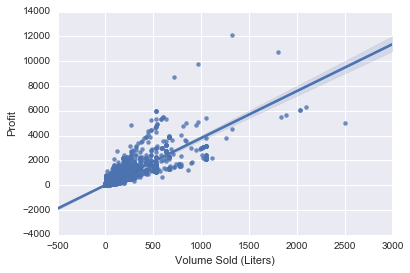

In [74]:
sns.regplot(x = "Volume Sold (Liters)", y = "Profit", data = df, scatter=True)

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


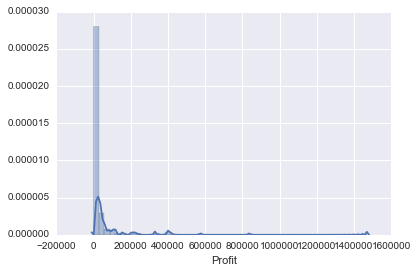

In [75]:
subset = df.groupby('City')["Profit"].sum()
subsetdf = pd.DataFrame(subset).reset_index()
profit_sub_set = subsetdf.sort('Profit', ascending = False)

sns.distplot(profit_sub_set["Profit"])

In [76]:
profit_sub_set.head()

,City,Profit
90,DES MOINES,1470751.39
51,CEDAR RAPIDS,839165.98
81,DAVENPORT,573073.66
175,IOWA CITY,418960.20
317,SIOUX CITY,407652.39


/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


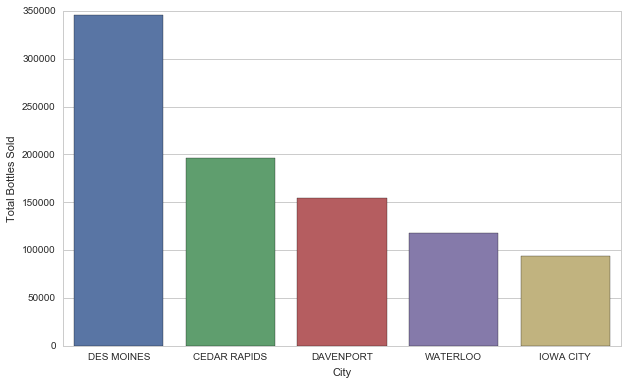

In [77]:
subset = df.groupby('City')["Bottles Sold"].sum()
subsetdf = pd.DataFrame(subset).reset_index()
bottles_sub_set = subsetdf.sort('Bottles Sold', ascending = False).head(5)

sns.set(rc= {"figure.figsize" : (10,6)}, style = "whitegrid")
ax = sns.barplot(x = "City", y= "Bottles Sold", data = bottles_sub_set)
ax.set(xlabel = "City", ylabel = "Total Bottles Sold")

plt.show()

In [1]:
bottles_sub_set

NameError: name 'bottles_sub_set' is not defined

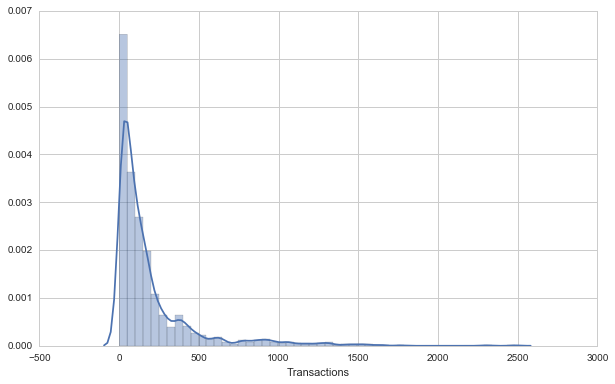

In [79]:
transactions = df["Store Number"].value_counts()
transactions = pd.DataFrame(transactions).reset_index().rename(columns = {'index': 'Store Number',
                                                                          'Store Number' : 'Transactions'})
# transactions

sns.distplot(transactions['Transactions'])

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

Top 5 Cities based on Bottles Sold:
 * Des Moines
 * Cedar Rapids
 * Davenport
 * Waterloo
 * Iowa City

Top 5 Cities based on Total Profits in dataset:
 * Des Moines
 * Cedar Rapids
 * Davenport
 * Iowa City
 * Sioux City

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [ ]:
#2015 to 2016 Sales

mask15 = df.Date.dt.year == 2015
df15 = df[mask15].groupby(["Store Number", 'City'])["Profit"].sum()
df15 = pd.DataFrame(df15).reset_index().sort_values(by = "Profit", ascending = False)

df15.head()

In [ ]:
# Quarterly Masks 

q1_15mask = (df.Date.dt.year == 2015) & (df.Date.dt.month >= 1) & (df.Date.dt.month <= 3)
q1_15 = df[q1_15mask].groupby(['Store Number', 'County Number', 'Date'])['Profit'].sum()
q1_15 = pd.DataFrame(q1_15).reset_index()

q1_16mask = (df.Date.dt.year == 2016) & (df.Date.dt.month >= 1) & (df.Date.dt.month <= 3)
q1_16 = df[q1_16mask].groupby(['Store Number','County Number', 'Date'])['Profit'].sum()
q1_16 = pd.DataFrame(q1_16).reset_index()

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [ ]:
df.corr()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model

In [ ]:
# model_set_store = df.groupby(['Store Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()
# model_set_itemcat = df.groupby(['Store Number', 'Item Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()u

In [80]:
df["Month"] = df["Date"].dt.month

In [82]:
def quarter_assigner(x):
    if x <= 3:
        return 1
    elif x <= 6:
        return 2
    elif x <= 9:
        return 3
    else:
        return 4
    
df['Quarter'] = df['Month'].map(quarter_assigner)
print df.Quarter[0:10]

0    4
1    1
2    1
3    1
4    3
5    2
6    3
7    2
8    1
9    4
Name: Quarter, dtype: int64


In [87]:
groups = df.groupby(['Quarter'])

def compare_quarters_stores(group):
    stores2015 = group[group.Date.dt.year == 2015]['Store Number']
    stores2016 = group[group.Date.dt.year == 2016]['Store Number']
    valid_stores = stores2015[stores2015.isin(stores2016)]
    quarter = group.Quarter.values[0]
    group['store_in_both_years_q'+str(quarter)] = group['Store Number'].isin(valid_stores)
    return group

In [88]:
tmp2 = groups.apply(compare_quarters_stores)

In [ ]:
tmp2.corr()

In [ ]:
# sub = tmp2.groupby(["quarter", "Store Number"])['store_in_both_years_q1', 'store_in_both_years_q2',
#                    'store_in_both_years_q3', 'store_in_both_years_q4'].min()
# sub = pd.DataFrame(sub).reset_index()
# sub.groupby("quarter").get_group(2)

In [90]:
tmp2.head()

,Bottle Volume (ml),Bottles Sold,Category,Category Name,City,County,County Number,Date,Item Description,Item Number,...,State Bottle Cost,State Bottle Retail,Store Number,Vendor Number,Volume Sold (Liters),Zip Code,store_in_both_years_q1,store_in_both_years_q2,store_in_both_years_q3,store_in_both_years_q4
0,750,12,1051100.0,APRICOT BRANDIES,SUMNER,Bremer,9.0,2015-11-04,Mr. Boston Apricot Brandy,54436,...,4.50,6.75,3717,55,9.0,50674,NaN,NaN,NaN,False
1,750,2,1011100.0,BLENDED WHISKIES,DAVENPORT,Scott,82.0,2016-03-02,Tin Cup,27605,...,13.75,20.63,2614,395,1.5,52807,True,NaN,NaN,NaN
2,1000,24,1011200.0,STRAIGHT BOURBON WHISKIES,CEDAR FALLS,Black Hawk,7.0,2016-02-11,Jim Beam,19067,...,12.59,18.89,2106,65,24.0,50613,True,NaN,NaN,NaN
3,1750,6,1071100.0,AMERICAN COCKTAILS,AMES,Story,85.0,2016-02-03,1800 Ultimate Margarita,59154,...,9.50,14.25,2501,395,10.5,50010,True,NaN,NaN,NaN
4,1750,12,1031080.0,VODKA 80 PROOF,BELMOND,Wright,99.0,2015-08-18,Five O'clock Vodka,35918,...,7.20,10.80,3654,297,21.0,50421,NaN,NaN,False,NaN


In [93]:
tmp2[tmp2['Store Number'] == 3717].columns

Index([u'Bottle Volume (ml)', u'Bottles Sold', u'Category', u'Category Name',
       u'City', u'County', u'County Number', u'Date', u'Item Description',
       u'Item Number', u'Profit', u'Sale (Dollars)', u'State Bottle Cost',
       u'State Bottle Retail', u'Store Number', u'Vendor Number',
       u'Volume Sold (Liters)', u'Zip Code', u'month', u'quarter',
       u'store_in_both_years_q1', u'store_in_both_years_q2',
       u'store_in_both_years_q3', u'store_in_both_years_q4'],
      dtype='object')

In [ ]:
### Linear Reg. for stores in Q1 2015 and Q1 2016

q1_15mask = (df.Date.dt.year == 2015) & (df.Date.dt.month >= 1) & (df.Date.dt.month <= 3)
q1_15 = df[q1_15mask].groupby(['Store Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()
q1_15 = pd.DataFrame(q1_15).reset_index()

q1_16mask = (df.Date.dt.year == 2016) & (df.Date.dt.month >= 1) & (df.Date.dt.month <= 3)
q1_16 = df[q1_16mask].groupby(['Store Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()
q1_16 = pd.DataFrame(q1_16).reset_index()

sub1 = q1_15['Store Number']
sub2 = q1_16['Store Number']

#mask for stores in Q1 of 2015 that are also in Q1 of 2016
anothaone = sub1.isin(sub2)
#new data frame of just Q1 2015 stores that are also in Q1 of 2016
newdf15 = q1_15[anothaone]

#mask for stores in Q1 of 2016 that are also in the new df of 15 values
anothatwo = sub2.isin(sub1)
#applied mask onto Q1 2016 to filter out stores that don't match new df 15 stores
newdf16 = q1_16[anothatwo]

cols = ['Bottles Sold','Volume Sold (Liters)']
lr = linear_model.LinearRegression()

x_train = newdf15[cols]
y_train = newdf15['Profit']

x_test = newdf16[cols]
y_test = newdf16["Profit"]

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
actual = y_test
print lr.score(x_test, y_test)
print lr.score(x_train, y_train)

%matplotlib inline
import matplotlib.pyplot as plt
sns.regplot(x=pred,y=actual)

In [ ]:
### Regression for the full year/stores that are in 2015 and 2016 (However, not specified to stores
### that are there throughout the year)

mask15 = df.Date.dt.year == 2015
fifteen = df[mask15].groupby(['Store Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()
fifteen = pd.DataFrame(fifteen).reset_index()

mask16 = df.Date.dt.year == 2016
sixteen = df[mask16].groupby(['Store Number'])['Bottles Sold', 'Volume Sold (Liters)', 'Profit'].sum()
sixteen = pd.DataFrame(sixteen).reset_index()

sub1 = fifteen['Store Number']
sub2 = sixteen['Store Number']

#mask for stores in Q1 of 2015 that are also in Q1 of 2016
anothaone = sub1.isin(sub2)
#new data frame of just Q1 2015 stores that are also in Q1 of 2016
df15 = fifteen[anothaone]

#mask for stores in Q1 of 2016 that are also in the new df of 15 values
anothatwo = sub2.isin(sub1)
#applied mask onto Q1 2016 to filter out stores that don't match new df 15 stores
df16 = sixteen[anothatwo]

#Regression Analysis

cols = ['Bottles Sold','Volume Sold (Liters)']
lr = linear_model.LinearRegression()

x_train = df15[cols]
y_train = df15['Profit']

x_test = df16[cols]
y_test = df16["Profit"]

lr.fit(x_train, y_train)
pred = lr.predict(x_test)
actual = y_test
print lr.score(x_test, y_test)
print lr.score(x_train, y_train)

%matplotlib inline
import matplotlib.pyplot as plt
sns.regplot(x=pred,y=actual)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.